# Build  a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioural data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn import preprocessing

In [4]:
df = pd.read_csv('bank-full.csv')

In [5]:
df.shape

(45211, 17)

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Label target feature y to 1/0

In [9]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [10]:
df['target'] = np.where(df['y'] == "yes", 1, 0)

In [11]:
df['target'].value_counts()

0    39922
1     5289
Name: target, dtype: int64

In [12]:
df['target'] = df['target'].astype('int64')

# Drop y feature and retain only target

In [13]:
df = df.drop(['y'], axis=1)

In [14]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


# Define target and independent features

In [15]:
Y = df['target']
X = df.drop(['target'], axis=1)

# Split features to numerical and categorical

In [16]:
numeric = X.select_dtypes(include=['int64'])
categorical = X.select_dtypes(include=['object'])

In [17]:
numeric.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [18]:
categorical.head()

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown


<Figure size 1440x720 with 0 Axes>

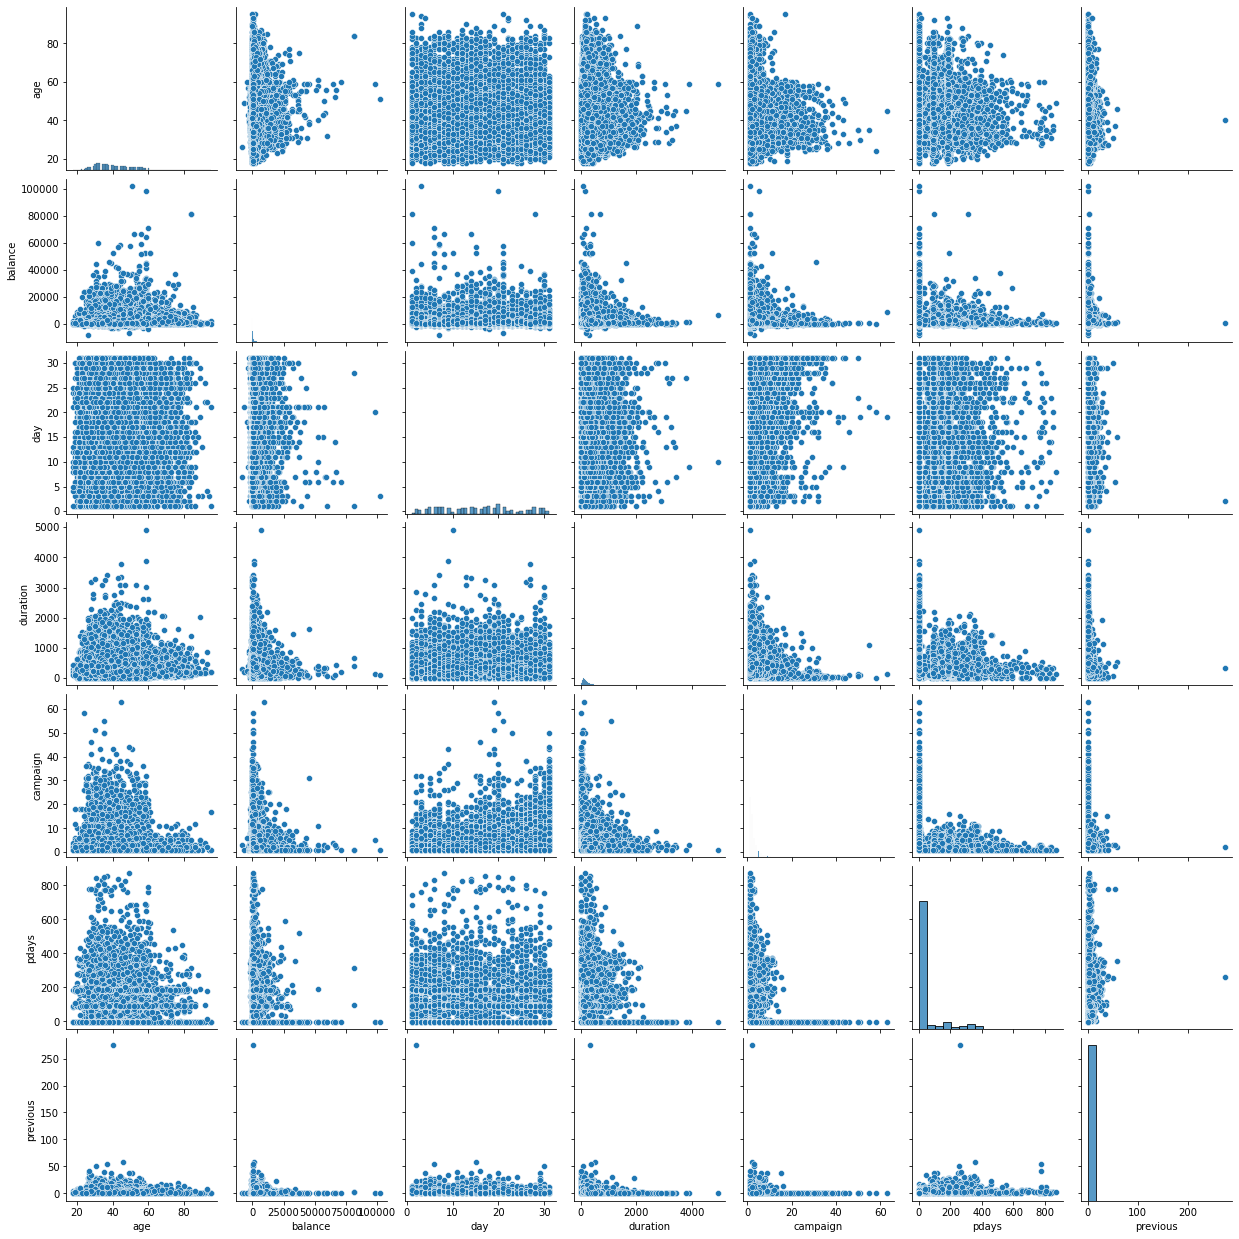

In [19]:
plt.figure(figsize=(20, 10))
sns.pairplot(numeric)
plt.show()

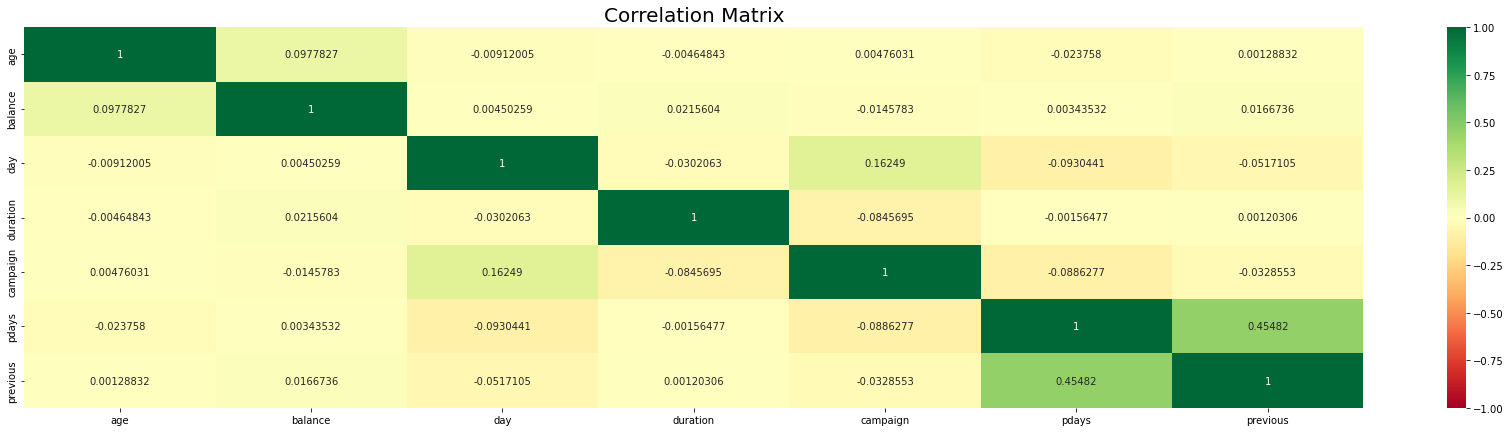

In [20]:
# Correlation Matrix Plotting
plt.figure(figsize=(30,7)) 
plt.title("Correlation Matrix", fontsize=20)
sns.heatmap(numeric.corr(),cmap='RdYlGn',annot=True,vmax=1.0,vmin=-1.0,fmt='g')  
#cmap is the color for heatmap, annot=True is to show the correlation matrix value on heatmap
#vmax and vmin are the threshold for the heatmap and fmt will create a scale
plt.show()

There is no much correlation among any of the numeric variables

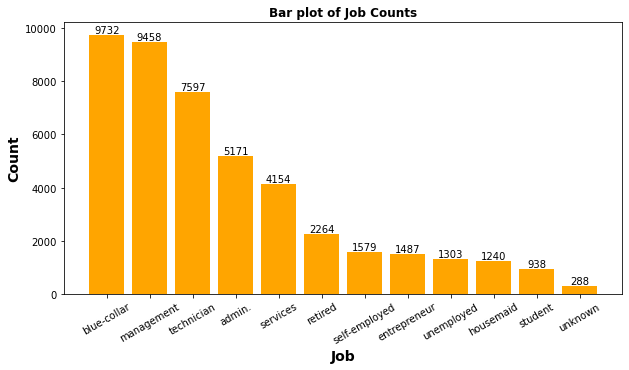

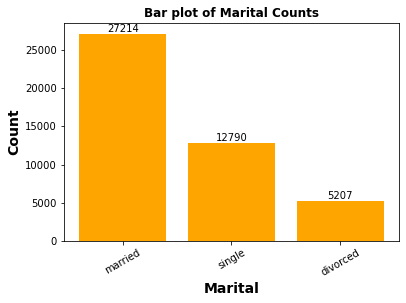

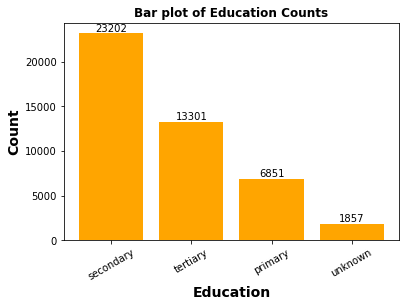

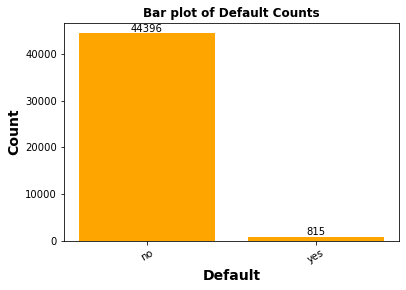

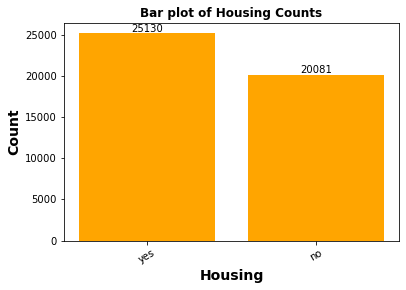

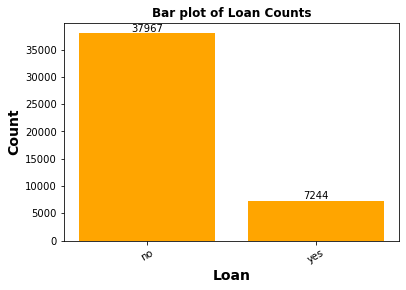

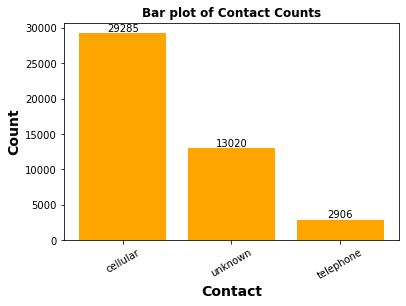

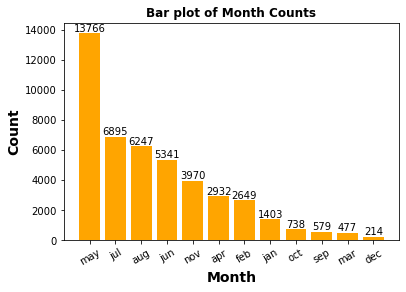

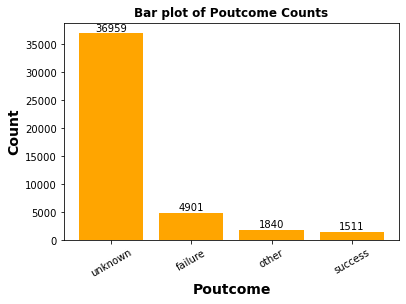

In [21]:
plt.figure(figsize=(10,5))
for cols in categorical:
    counts = df[cols].value_counts()
    plt.bar(counts.index, counts, color='orange')
    plt.xlabel(cols.capitalize(), fontweight='bold', fontsize=14)
    plt.ylabel('Count', fontweight='bold', fontsize=14)
    plt.title("Bar plot of " + cols.capitalize() + " Counts", fontweight='bold')

    for i, count in enumerate(counts):
        plt.text(i, count, str(count), ha='center', va='bottom')
    plt.xticks(rotation=30)
    plt.show()

From the above histogram we can see that:             
1. Most of the customere contacted were into white collar jobs. 

2. Most of the customers did not have any credit default

3. Most of the customers had a housing loan

4. Most of the customers were contacted through cellular phones

5. The more number of customers contacted last were in the month of May

6. The outcome of the previous campaign is unknown for most of the customers

# Label Encoding

In [22]:
label_encoder = preprocessing.LabelEncoder()

for cols in categorical:
    # Encode labels in column .
    categorical[cols]= label_encoder.fit_transform(categorical[cols])
    categorical[cols].unique()

In [23]:
categorical.head()

,job,marital,education,default,housing,loan,contact,month,poutcome
0,4,1,2,0,1,0,2,8,3
1,9,2,1,0,1,0,2,8,3
2,2,1,1,0,1,1,2,8,3
3,1,1,3,0,1,0,2,8,3
4,11,2,3,0,0,0,2,8,3


# Combining categorical and numerical features together

In [24]:
X_all = pd.concat([numeric, categorical], axis=1, join="inner")

In [25]:
X_all.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3


# Train Test Split

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=10)

In [27]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)

Shape of Training Data (31647, 16)
Shape of Testing Data (13564, 16)


# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=0)

In [29]:
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 7, 'min_samples_split': 50}


In [30]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=7,min_samples_split=50)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=50, random_state=0)

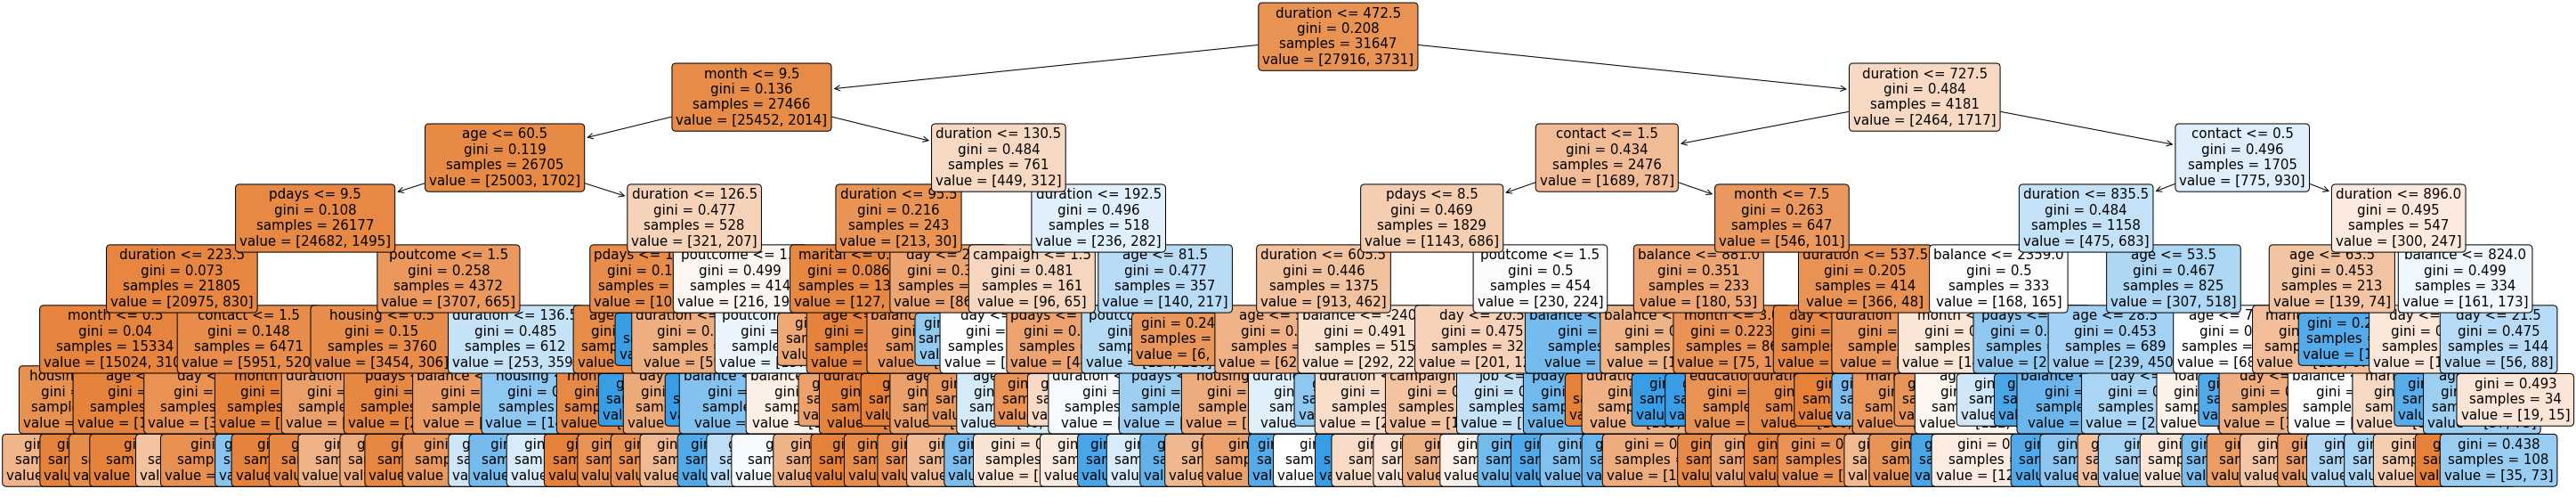

In [31]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
plt.figure(figsize=[50,10])
tree.plot_tree(dtree,filled=True,fontsize=15,rounded=True,feature_names=X_all.columns)
plt.show()

# Model Evaluation

In [32]:
y_pred_tree=dtree.predict(X_test)

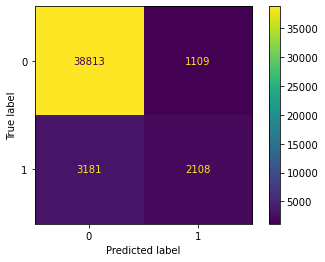

In [33]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
metrics.plot_confusion_matrix(dtree,X_all,Y)

In [34]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.8998820406959599
Precision 0.602880658436214
Recall 0.3761232349165597
f1_score 0.4632411067193676
